# Libraries

In [40]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '.'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from src import data, returns
from src.portfolio import PortfolioData

# Data

In [61]:
orders_df = data.load_orders('data/orders.csv')
portfolio_data = PortfolioData(orders_df)

[*********************100%***********************]  5 of 5 completed


/Users/calvindelima/projects/investing/.venv/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [52]:
portfolio_data.asset_snapshot.head()

,asset,asset_cost_usd,asset_value_usd
snapshot_date,,,
2021-04-05,COUR,793.76,789.360016
2021-04-06,COST,720.24,719.150238
2021-04-06,COUR,793.76,861.919983
2021-04-07,COST,720.24,718.913055
2021-04-07,COUR,793.76,922.399994


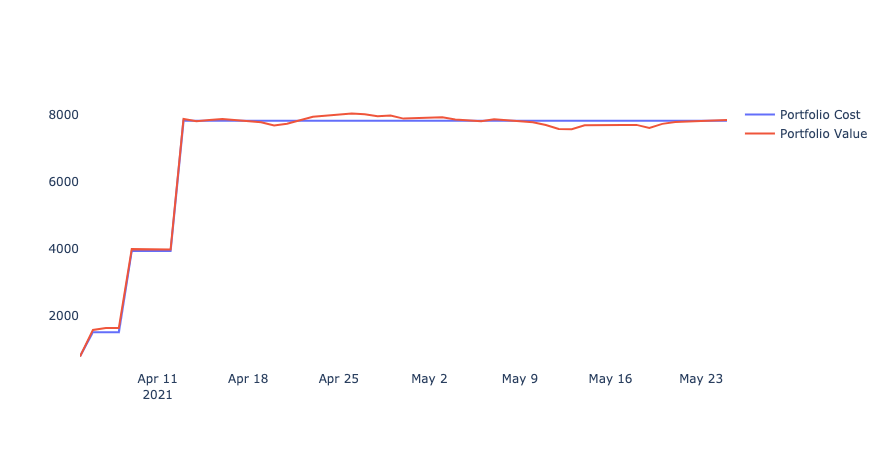

In [29]:
snapshot = portfolio_data.portfolio_snapshot

fig = go.Figure()

fig.add_trace(go.Scatter(
  x = snapshot.index,
  y = snapshot['portfolio_cost_usd'],
  mode = 'lines',
  name = 'Portfolio Cost'
))

fig.add_trace(go.Scatter(
  x = snapshot.index,
  y = snapshot['portfolio_value_usd'],
  mode = 'lines',
  name = 'Portfolio Value'
))

fig.update_layout(
  plot_bgcolor = '#ffffff'
)

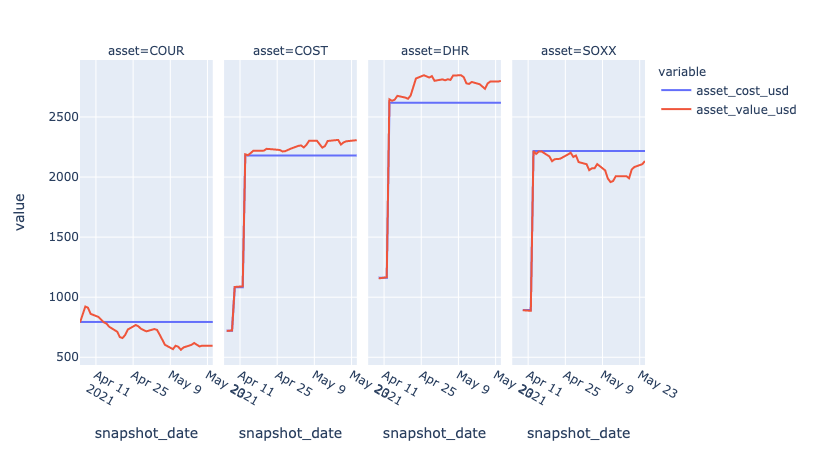

In [39]:
import plotly.express as px

snapshot = (
  portfolio_data
    .asset_snapshot
    .reset_index()
    .melt(
      id_vars = ['snapshot_date', 'asset']
    )
)

fig = px.line(
  snapshot, 
  x = 'snapshot_date', 
  y = 'value', 
  color = 'variable', 
  facet_col = 'asset'
)

# fig.update_xaxes(matches=None)

fig.show()

In [65]:
portfolio_data.asset_snapshot.head(10)

,asset,asset_cost_usd,asset_value_usd
snapshot_date,,,
2021-04-05,COUR,793.76,789.360016
2021-04-06,COST,720.24,719.150238
2021-04-06,COUR,793.76,861.919983
2021-04-07,COST,720.24,718.913055
2021-04-07,COUR,793.76,922.399994
2021-04-08,COST,720.24,723.247894
2021-04-08,COUR,793.76,912.000000
2021-04-09,COST,1083.45,1085.015442
2021-04-09,SOXX,893.60,891.369995


In [69]:
portfolio_data.portfolio_snapshot

,portfolio_cost_usd,portfolio_value_usd
snapshot_date,,
2021-04-05,793.76,789.360016
2021-04-06,1514.00,1581.070221
2021-04-07,1514.00,1641.313049
2021-04-08,1514.00,1635.247894
2021-04-09,3932.61,3993.915436
2021-04-12,3932.61,3977.565308
2021-04-13,7809.18,7865.952950
2021-04-14,7809.18,7799.221252
2021-04-15,7809.18,7833.905045


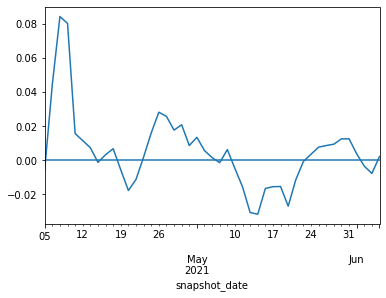

In [68]:
portfolio_data.returns_snapshot['return'].plot();
plt.axhline(0)